## 1) Importing Libraries

In [36]:
# here to import needed libaries which will be used in our project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

## 2) Data 

In [37]:
#ls

In [38]:
data = pd.read_excel('Data_Train.xlsx')
test = pd.read_excel('Test_set.xlsx')

In [39]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [40]:
print(f'there are {data.shape[0]} row and {data.shape[1]} columns in our training set')

there are 10683 row and 11 columns in our training set


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


## 3) handling null Values

In [42]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [43]:
data['Route'].isnull().values

array([False, False, False, ..., False, False, False])

In [44]:
# getting the index where null value in it
for index , value in enumerate(data['Route'].isnull().values):
    if value:
        print(f'Null value at index {index}')

Null value at index 9039


In [45]:
data.loc[9039]

Airline               Air India
Date_of_Journey       6/05/2019
Source                    Delhi
Destination              Cochin
Route                       NaN
Dep_Time                  09:45
Arrival_Time       09:25 07 May
Duration                23h 40m
Total_Stops                 NaN
Additional_Info         No info
Price                      7480
Name: 9039, dtype: object

In [46]:
## let's delete null value row
data.drop([9039], axis = 0 , inplace=True)

In [47]:
data.reset_index(inplace=True)
data.drop(['index'],axis=1,inplace=True)

## 4) Data Processing

In [130]:
def show_column_details(col):
    global data
    print(f'for feature {col}')
    print(f'Number of Nulls is {data[col].isna().sum()}')
    print(f'Number of Unique Values is {len(data[col].unique())}')
    print(f'Random Value is {data[col][np.random.randint(data.shape[0])]}')
    print(f'Random Value is {data[col][np.random.randint(data.shape[0])]}')
    print(f'Random Value is {data[col][np.random.randint(data.shape[0])]}')
    print('\n\n==================================\n\n')

In [49]:
show_column_details('Date_of_Journey')

for feature Date_of_Journey
Number of Nulls is 0
Number of Unique Values is 44
Random Value is 9/03/2019
Random Value is 27/06/2019
Random Value is 3/06/2019






In [50]:
# let's extract day , month and year from "date_of_jounry" column
data['DayOfJourny'] = data['Date_of_Journey'].apply(lambda x:x.split('/')[0])
data['MonthOfJourny'] = data['Date_of_Journey'].apply(lambda x:x.split('/')[1])
data['YearOfJourny'] = data['Date_of_Journey'].apply(lambda x:x.split('/')[2])

In [51]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,DayOfJourny,MonthOfJourny,YearOfJourny
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [52]:
data['DayOfJourny'].unique()

array(['24', '1', '9', '12', '01', '27', '18', '3', '15', '6', '21', '06',
       '09', '03'], dtype=object)

In [53]:
data['MonthOfJourny'].unique()

array(['03', '05', '06', '04'], dtype=object)

In [54]:
data['YearOfJourny'].unique()

array(['2019'], dtype=object)

In [55]:
# there is only unique value in year column so let's delete it 
data.drop('YearOfJourny',axis = 1 , inplace=True)

In [56]:
data['DayOfJourny'] = data['DayOfJourny'].astype(int)
data['MonthOfJourny'] = data['MonthOfJourny'].astype(int)

In [57]:
data['DayOfJourny'].unique()

array([24,  1,  9, 12, 27, 18,  3, 15,  6, 21])

In [58]:
data['MonthOfJourny'].unique()

array([3, 5, 6, 4])

In [59]:
show_column_details('Arrival_Time')

for feature Arrival_Time
Number of Nulls is 0
Number of Unique Values is 1343
Random Value is 01:00 02 Jun
Random Value is 17:15
Random Value is 04:40 07 May






In [60]:
data['AccurateArrivalTime'] = data['Arrival_Time'].apply(lambda x : x.split()[0])

In [61]:
data['AccurateArrivalTime'].head()

0    01:10
1    13:15
2    04:25
3    23:30
4    21:35
Name: AccurateArrivalTime, dtype: object

In [62]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,DayOfJourny,MonthOfJourny,AccurateArrivalTime
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,01:10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,13:15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,04:25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,23:30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,21:35


In [63]:
data['stopCount'] = data['Route'].apply(lambda x:str(x).count('→') - 1)
data[['stopCount','Total_Stops']].head()

,stopCount,Total_Stops
0,0,non-stop
1,2,2 stops
2,2,2 stops
3,1,1 stop
4,1,1 stop


In [64]:
data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [65]:
data['stopCount'].value_counts()

1    5625
0    3491
2    1520
3      45
4       1
Name: stopCount, dtype: int64

In [66]:
data[data['stopCount'] == 4]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,DayOfJourny,MonthOfJourny,AccurateArrivalTime,stopCount
9181,Air India,01/03/2019,Banglore,New Delhi,BLR → CCU → BBI → HYD → VGA → DEL,05:50,11:20 02 Mar,29h 30m,4 stops,Change airports,17686,1,3,11:20,4


In [67]:
data['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [68]:
data['Additional_Info'].replace('No Info','No info',inplace=True)

In [69]:
data['Additional_Info'].value_counts()

No info                         8347
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [70]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,DayOfJourny,MonthOfJourny,AccurateArrivalTime,stopCount
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,01:10,0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,13:15,2
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,04:25,2
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,23:30,1
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,21:35,1


In [72]:
def DayPart(n) : 
    H = int(n.split(':')[0])
    if H < 6 : 
        return 'Early Morning'
    elif 6<=H < 12 : 
        return 'Morning'
    elif  12<=H < 15 : 
        return 'Noon'
    elif  15<=H < 19 : 
        return 'Evening'
    else : 
        return 'Night'    

In [73]:
data['DepartureDayPart']   = data['Dep_Time'].apply(lambda x : DayPart(x))
data['ArrivalDayPart']   = data['AccurateArrivalTime'].apply(lambda x : DayPart(x))
data[['Dep_Time','DepartureDayPart','AccurateArrivalTime','ArrivalDayPart']]

,Dep_Time,DepartureDayPart,AccurateArrivalTime,ArrivalDayPart
0,22:20,Night,01:10,Early Morning
1,05:50,Early Morning,13:15,Noon
2,09:25,Morning,04:25,Early Morning
3,18:05,Evening,23:30,Night
4,16:50,Evening,21:35,Night
...,...,...,...,...
10677,19:55,Night,22:25,Night
10678,20:45,Night,23:20,Night
10679,08:20,Morning,11:20,Morning
10680,11:30,Morning,14:10,Noon


In [100]:
def convertDuration(time):
    time_splited = time.split()
    try :
        hour = int(time_splited[0].replace('h',''))
        
    except:
        hour = 0
    try:
        minute = int(time_splited[1].repalce('m',''))
    except:
        minute = 0
    return hour * 60  + minute
    
    

In [101]:
data['DurationInMinutes'] = data['Duration'].apply(convertDuration)

In [103]:
data.corr()

,Price,DayOfJourny,MonthOfJourny,stopCount,DurationInMinutes
Price,1.000000,-0.153774,-0.103643,0.603897,0.508778
DayOfJourny,-0.153774,1.000000,-0.038359,-0.009451,-0.022059
MonthOfJourny,-0.103643,-0.038359,1.000000,0.054383,0.016141
stopCount,0.603897,-0.009451,0.054383,1.000000,0.739916
DurationInMinutes,0.508778,-0.022059,0.016141,0.739916,1.000000


In [124]:
print(f"minimum duration {data['DurationInMinutes'].min()}")
print(f"maximum duration {data['DurationInMinutes'].max()}")

minimum duration 0 
maximum duration 2820


In [112]:
def FlightLength(H) : 
    if H < 180 : 
        return 'Short'
    elif 180<=H < 600 : 
        return 'Medium'
    else : 
        return 'Long' 

In [115]:
data['FlightLength']   = data['DurationInMinutes'].apply(lambda x : FlightLength(x))
data[['DurationInMinutes','FlightLength']].head()

,DurationInMinutes,FlightLength
0,120,Short
1,420,Medium
2,1140,Long
3,300,Medium
4,240,Medium


In [116]:
data['FlightLength'].value_counts()

Long      4758
Short     3024
Medium    2900
Name: FlightLength, dtype: int64

In [126]:
data['Price'].max() , data['Price'].min()

(79512, 1759)

In [127]:
def PriceRange(H) : 
    if H < 5000 : 
        return 'Cheap'
    elif 5000<=H < 10000 : 
        return 'Medium'
    else : 
        return 'Expensive'

In [128]:
data['PriceRange']   = data['Price'].apply(lambda x : PriceRange(x))
data[['Price','PriceRange']].head()

,Price,PriceRange
0,3897,Cheap
1,7662,Medium
2,13882,Expensive
3,6218,Medium
4,13302,Expensive


In [129]:
data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

## 5) Data Visualization

In [138]:
def Pie(feature,limit= 10):
    global data
    plt.figure(figsize=(12,6))
    values = data[feature].value_counts()[:limit]
    plt.pie(values , labels = list(values.index),autopct='%1.f%%',labeldistance=1.1)
    plt.show()
def Kde(feature):
    global data
    plt.figure(figsize=(12,6))
    sns.kdeplot(data[feature],shade=True)
    plt.show()
    
def countPlot(feature):
    global data
    plt.figure(figsize=(11,6))
    sns.countplot(x=feature , data=data)
    plt.show()
    

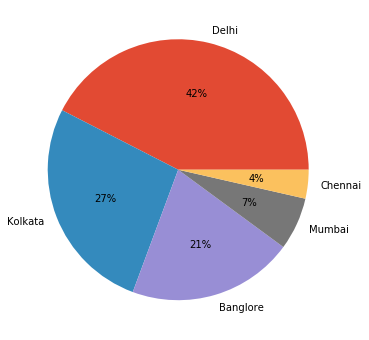

In [140]:
Pie('Source')
# most frequcnted Source is Delhi

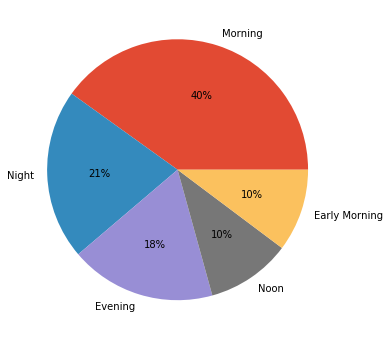

In [141]:
Pie('DepartureDayPart')
# most flights departures at morning

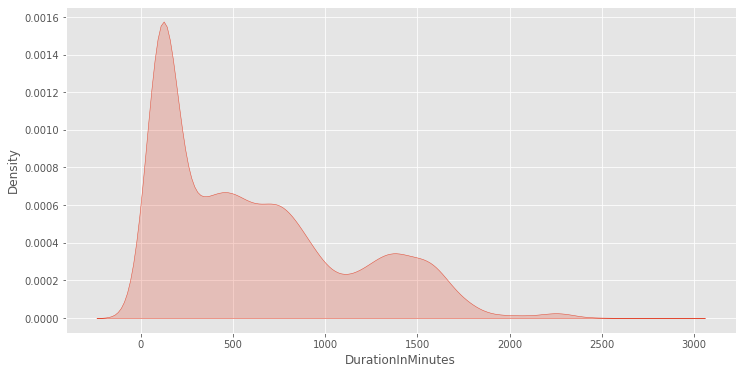

In [144]:
Kde('DurationInMinutes')